<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd
import math
import random
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [3]:
dataset = pd.read_excel('kmean.xlsx',sheet_name='ex7data2_X',header=None)

In [4]:
dataset.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
x = np.array(dataset)

In [7]:
import random

In [8]:
init_centroids = random.sample(range(0,len(dataset)),3)

In [9]:
init_centroids #index position of dataset

[123, 114, 33]

In [10]:
centroids=[]
for i in init_centroids:
    centroids.append(dataset.iloc[i])

In [11]:
centroids

[0    4.255885
 1    0.906440
 Name: 123, dtype: float64, 0    3.161090
 1    1.294229
 Name: 114, dtype: float64, 0    3.297652
 1    5.592055
 Name: 33, dtype: float64]

In [12]:
centroids = np.array(centroids)

In [13]:
def calc_distance(x,y):         #calculate distance between two points
    return (sum((x-y)**2))**0.5

In [14]:
def findclosetcentroids(c,x):
    assign_centroid=[]
    for i in x:
        distance=[]
        for j in c:
            distance.append(calc_distance(i,j))
        assign_centroid.append(np.argmin(distance))        # np.argmin return index of min element
    return assign_centroid

In [15]:
get_centroid=findclosetcentroids(centroids,x)

In [16]:
def calc_centroids(cluster,x):
    new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
    new_centroid=[]
    for c in set(new_df1['cluster']):     #return unique values of the clusters
        current_cluster=new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)

    return new_centroid


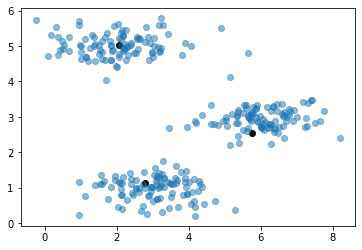

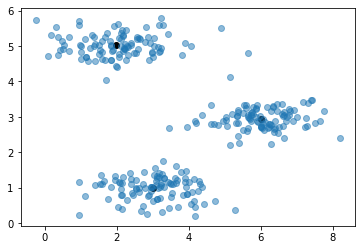

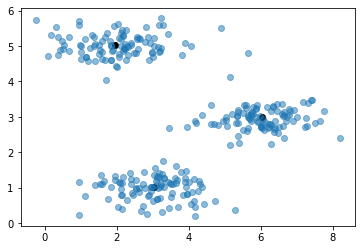

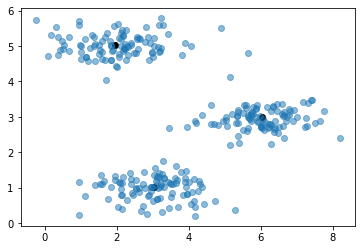

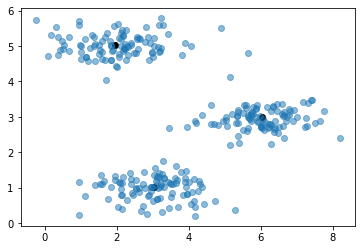

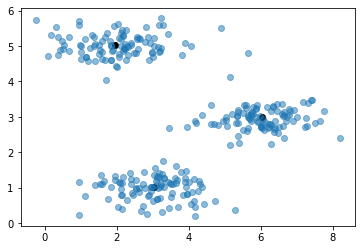

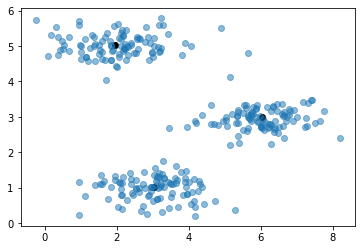

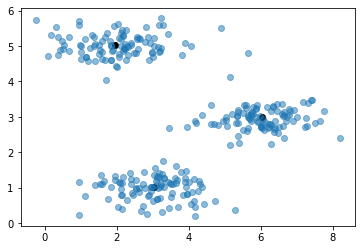

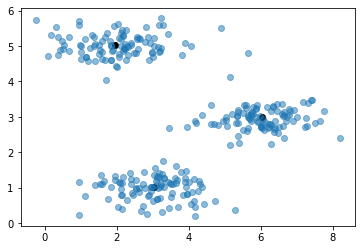

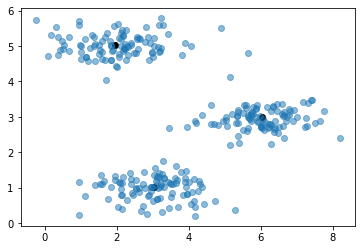

In [17]:
for i in range(10):
    get_centroid= findclosetcentroids(centroids,x)  #we have obtained the cluster number for each obervation
    centroids=calc_centroids(get_centroid,x)

    #visualization
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
    plt.show()

In [18]:
import cv2
im = cv2.imread('tom.jpeg')

In [19]:
im.shape

(200, 200, 3)

In [20]:
im= (im/255).reshape(200*200,3)

In [21]:
init_centroids = random.sample(range(0,len(im)),10)

In [22]:
init_centroids

[27491, 18697, 2610, 7194, 23839, 6596, 22914, 22932, 12524, 11394]

In [23]:
centroids=[]
for i in init_centroids:
    centroids.append(im[i])

In [24]:
im = np.array(im)

In [27]:
for i in range(15):
    print(i)
    get_centroid= findclosetcentroids(centroids,im)  #we have obtained the cluster number for each obervation
    centroids=calc_centroids(get_centroid,im)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [28]:
im_recovered = im.copy()
for i in range(len(im)):
    im_recovered[i] = centroids[get_centroid[i]]

In [29]:
im_recovered = im_recovered.reshape(200,200, 3)

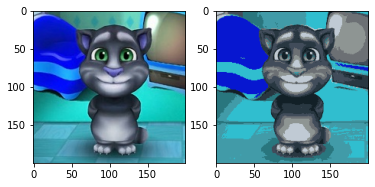

In [30]:
im1 = cv2.imread('tom.jpeg')

import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(im1)
ax[1].imshow(im_recovered)